In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
data2 = pd.read_csv('Market_Risk_Data_coded.csv')

In [3]:
data2

,Date,ITC Limited,Bharti Airtel,Tata Motors,DLF Limited,Yes Bank
0,28-03-2016,217,316,386,114,173
1,04-04-2016,218,302,386,121,171
2,11-04-2016,215,308,374,120,171
3,18-04-2016,223,320,408,122,172
4,25-04-2016,214,319,418,122,175
...,...,...,...,...,...,...
413,26-02-2024,411,1118,937,898,26
414,04-03-2024,412,1132,993,925,25
415,11-03-2024,417,1186,1035,928,24
416,18-03-2024,419,1225,946,826,24


In [4]:
data2['Date'] = [pd.to_datetime(d) for d in data2['Date']]


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_20292\2654786601.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data2['Date'] = [pd.to_datetime(d) for d in data2['Date']]


In [5]:
data2

,Date,ITC Limited,Bharti Airtel,Tata Motors,DLF Limited,Yes Bank
0,2016-03-28,217,316,386,114,173
1,2016-04-04,218,302,386,121,171
2,2016-11-04,215,308,374,120,171
3,2016-04-18,223,320,408,122,172
4,2016-04-25,214,319,418,122,175
...,...,...,...,...,...,...
413,2024-02-26,411,1118,937,898,26
414,2024-04-03,412,1132,993,925,25
415,2024-11-03,417,1186,1035,928,24
416,2024-03-18,419,1225,946,826,24


In [6]:
data2.set_index('Date', inplace=True)


In [8]:
data2

,ITC Limited,Bharti Airtel,Tata Motors,DLF Limited,Yes Bank
Date,,,,,
2016-03-28,217,316,386,114,173
2016-04-04,218,302,386,121,171
2016-11-04,215,308,374,120,171
2016-04-18,223,320,408,122,172
2016-04-25,214,319,418,122,175
...,...,...,...,...,...
2024-02-26,411,1118,937,898,26
2024-04-03,412,1132,993,925,25
2024-11-03,417,1186,1035,928,24


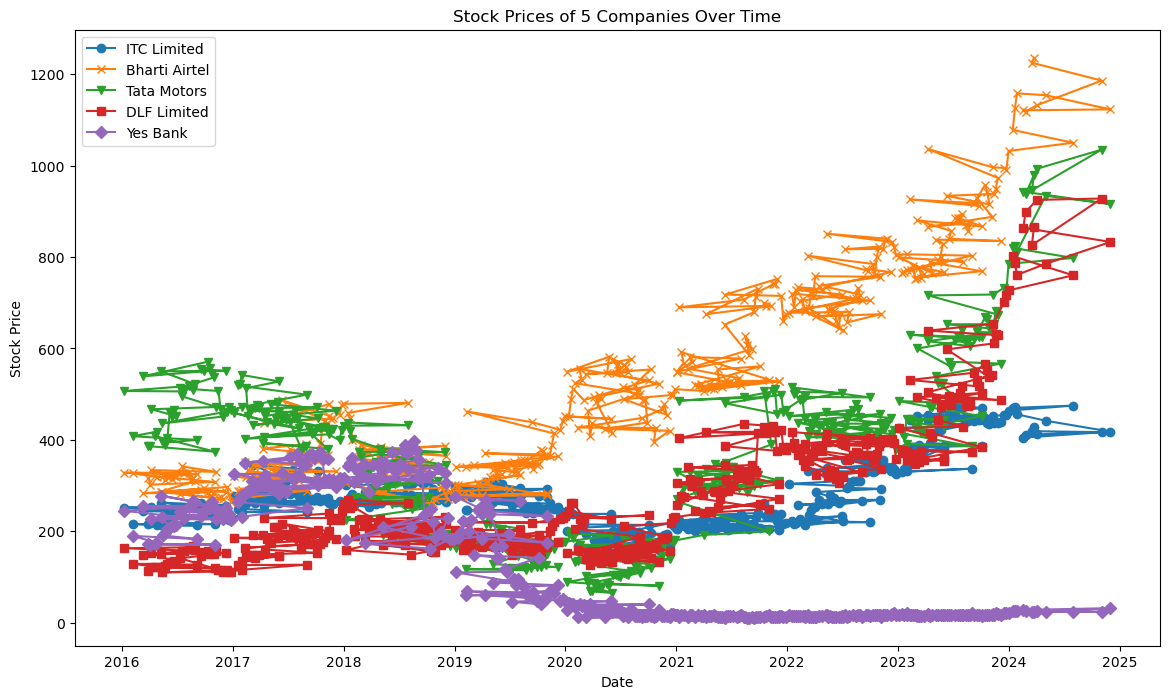

In [12]:

plt.figure(figsize=(14, 8))


plt.plot(data2.index, data2['ITC Limited'], label='ITC Limited', linestyle='-', marker='o')
plt.plot(data2.index, data2['Bharti Airtel'], label='Bharti Airtel',linestyle='-', marker='x')
plt.plot(data2.index, data2['Tata Motors'], label='Tata Motors',linestyle='-', marker='v')
plt.plot(data2.index, data2['DLF Limited'], label='DLF Limited',linestyle='-', marker='s')
plt.plot(data2.index, data2['Yes Bank'], label='Yes Bank',linestyle='-', marker='D')


plt.title('Stock Prices of 5 Companies Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()

# Display the plot
plt.show()


In [13]:

returns = data2.pct_change().dropna()


In [14]:
returns

,ITC Limited,Bharti Airtel,Tata Motors,DLF Limited,Yes Bank
Date,,,,,
2016-04-04,0.004608,-0.044304,0.000000,0.061404,-0.011561
2016-11-04,-0.013761,0.019868,-0.031088,-0.008264,0.000000
2016-04-18,0.037209,0.038961,0.090909,0.016667,0.005848
2016-04-25,-0.040359,-0.003125,0.024510,0.000000,0.017442
2016-02-05,0.009346,0.025078,-0.023923,0.057377,0.085714
...,...,...,...,...,...
2024-02-26,0.014815,-0.002676,-0.006363,0.039352,-0.071429
2024-04-03,0.002433,0.012522,0.059765,0.030067,-0.038462
2024-11-03,0.012136,0.047703,0.042296,0.003243,-0.040000


In [15]:

# Calculate mean and standard deviation of returns for each stock
mean_returns = returns.mean()
std_returns = returns.std()


In [16]:
mean_returns

ITC Limited      0.002281
Bharti Airtel    0.004029
Tata Motors      0.004088
DLF Limited      0.006540
Yes Bank        -0.000475
dtype: float64

In [17]:
std_returns = returns.std()

In [18]:
std_returns

ITC Limited      0.036127
Bharti Airtel    0.039073
Tata Motors      0.061976
DLF Limited      0.057796
Yes Bank         0.091095
dtype: float64

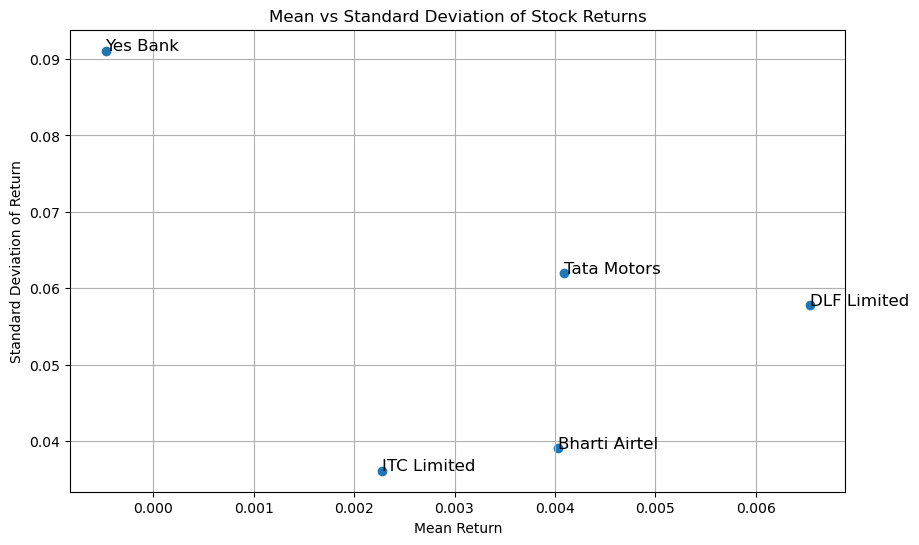

In [19]:

plt.figure(figsize=(10, 6))
plt.scatter(mean_returns, std_returns, marker='o')


for stock in mean_returns.index:
    plt.text(mean_returns[stock], std_returns[stock], stock, fontsize=12)


plt.title("Mean vs Standard Deviation of Stock Returns")
plt.xlabel("Mean Return")
plt.ylabel("Standard Deviation of Return")


plt.grid(True)
plt.show()
